y_true:
[1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 2 0 2 2 3 0 2]

y_pred:
[1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 2 3 3 1 2 2 3]


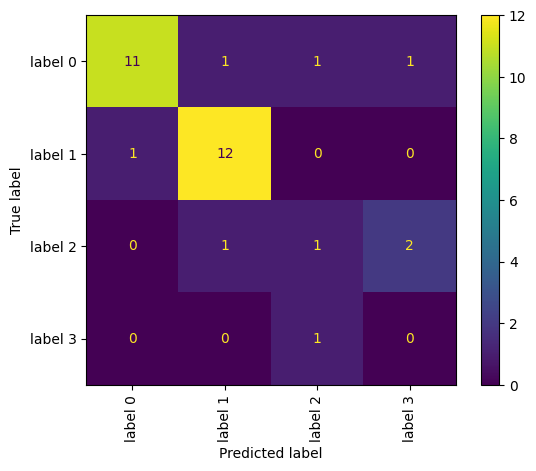

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
#
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_true = train_test_split(X, y, random_state=69)
clf = SVC(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred = np.append([y_pred], [2, 3, 3, 1, 2, 2, 3])
y_true = np.append([y_true], [2, 0, 2, 2, 3, 0, 2])
label_names = ["label 0", "label 1", "label 2", "label 3"]
print(f"y_true:\n{y_true}\n\ny_pred:\n{y_pred}")
#
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=label_names, xticks_rotation="vertical")
plt.show()

dict_keys(['label 0', 'label 1', 'label 2', 'label 3'])


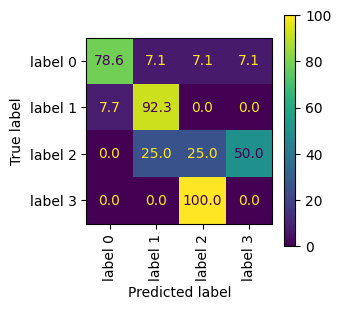

In [2]:
def make_confusion_matrix(y_true, y_pred, labels, percentage=True, plot=True, size=15):
    """
    This function makes a confusion matrix.
    parameters:
        - y_true: list of true labels
        - y_pred: list of predicted labels
        - labels: list of label names (=> list of strings)
        - pecentage:
              - True (default) => the values in each row (that is for each actual class) a converted to percentages
              - False => keep raw counts
        - plot:
              - True (default) => plot confusion matrix
              - False => return confusion matrix as np.array
         - size: size of plot (15 by default)
    """
    y_true_flat = y_true
    y_pred_flat = y_pred
    idx_dict = {}
    dim = len(labels)
    for i in range(dim):
        idx_dict[labels[i]] = i
    print(idx_dict.keys())
    conf_matrix = np.zeros((dim, dim))
    for i in range(len(y_true_flat)):
        row = idx_dict[f"label {y_true_flat[i]}"] # true label
        col = idx_dict[f"label {y_pred_flat[i]}"] # pred label
        conf_matrix[row, col] += 1
    if percentage==True:
        values_format = ".1f"
        for i in range(len(conf_matrix)):
            conf_matrix[i] *= 100/np.sum(conf_matrix[i])
    else:
        values_format = "d"
        conf_matrix = conf_matrix.astype(int)
    if not plot:
        return conf_matrix
    cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
    #cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
    fig, ax = plt.subplots(figsize=(size,size))
    cmd.plot(ax=ax, xticks_rotation="vertical", values_format=values_format)
    #cmd.plot(ax=ax, xticks_rotation="vertical", values_format=values_format)
    pass

make_confusion_matrix(y_true, y_pred, label_names, percentage=True, size=3)

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

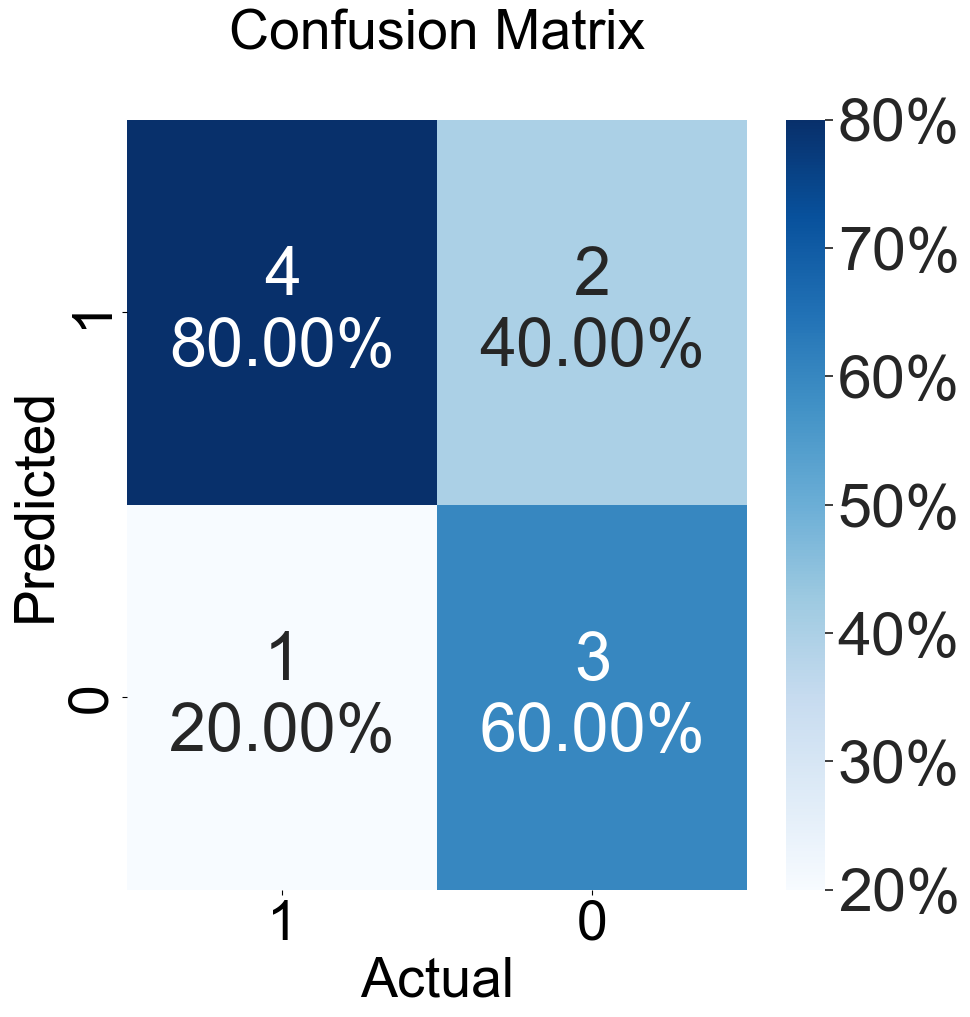

In [3]:
# https://stackoverflow.com/questions/76623953/seaborn-confusion-matrix-set-data-for-colorbar
fig, ax = plt.subplots(figsize=(10, 10))
truth_labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
pred_labels = [1, 1, 1, 1, 0, 1, 1, 0, 0, 0]
TITLE_FONT_SIZE = {"size":"40"}
LABEL_FONT_SIZE = {"size":"40"}
LABEL_SIZE = 40

conf_matrix = confusion_matrix(pred_labels, truth_labels, labels=[1, 0])
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_normalized_percentages = conf_matrix / np.sum(conf_matrix, axis=0, keepdims=True)
group_normalized_percentages_2=["{0:.2%}".format(value) for value in group_normalized_percentages.ravel()]
cell_labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_normalized_percentages_2)]
cell_labels = np.asarray(cell_labels).reshape(2, 2)

sns.set(font_scale=4.0)
sns.heatmap(100.0*group_normalized_percentages, annot=cell_labels, cmap="Blues", fmt="", ax=ax,cbar_kws={'format': '%.0f%%'})

# Titles, axis labels, etc.
title = "Confusion Matrix\n"

ax.set_title(title, fontdict=TITLE_FONT_SIZE)
ax.set_xlabel("Actual", fontdict=LABEL_FONT_SIZE)
ax.set_ylabel("Predicted", fontdict=LABEL_FONT_SIZE)
ax.tick_params(axis="both", which="major", labelsize=LABEL_SIZE)
ax.set_xticklabels(["1", "0"])
ax.set_yticklabels(["1", "0"], rotation=90, va="center")

In [16]:
!pwd

/Users/matthias/Desktop/Current/VotumPro/repository/code/backend


In [17]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 585.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 8.4 MB/s eta 0:00:00:00:01
